# Fine trattazione Evapotraspirazione

Dopo aver calcolato l'Evapotraspirazione col modello di Priestley Taylor e quello di Penman Monteith sono stati ricavati anche i risultati per l'evaporazione del suolo (sempre tramite il modello di Penman Monteith) e la traspirazione dalla pianta (col modello di Prospero, il modello più fisicamente basato). 

E', per concludere, possibile mettere insieme questi risultati, tramite l'utilizzo di un altro .sim file: ET Prospero PM. In questo file teniamo conto sia dello stress factor per l'evaporazione che per la traspirazione e calcoliamo l'evaporazione dal suolo tenendo però conto della radiazione di Prospero dalle piante.


## Parametri di suolo e vegetazione iniziali: silt-loam e conifera
Per questa simulazione è stata presa in considerazione sempre una foresta di conifere situata in prossimità del centroide per la stazione di Cavone. La tipologia di suolo è la stessa già descritta per il modello di Priestley - Taylor e per questo i parametri non cambiano:
- $\theta_{FC}$ (*Water Field Capacity*), contenuto d'acqua relativo a una condizione di equilibrio tra forza di gravità e forza di capillarità, pari a: $0.29$ [-]
- $\theta_{WC}$ (*Water Wilting Point*), contenuto d'acqua in corrispondenza del punto di appassimento, pari a: $0.15$ [-]
- $Z_r$ (*roots depth*) corrisponde alla profondità delle radici : $1.25$ [$m$]
- $p$ (*Depletion Fraction*) è la frazione media della *TAW* (*Total Available Soil Water*) che può essere consumata dalle radici prima di arrivare a stress idrico; in questo caso pari a: $0.7$ [-]
- $K_{c, end}$ (*Crop Coefficient*) coefficiente che descrive gli effetti delle caratteristiche del raccolto sullo stress idrico del suolo,posto pari a : $1$ [-]
- $Soil Moisture$: sinuisoidale (tra i valori di $\theta_{WC}$ e $\theta_{FC}$)
- $CI$: inizialmente costante, viene poi calcolato per simulare la presenza di nuvole nel cielo
- $LAI$: andamento sinusoidale, prende valori tra $5$ (pino silvestre) e $10$ (abete rosso) [LAI conifere](http://sanzenoneallambropgt.magnani.it/DdP/2.8%20allegato%20indice%20fogliare.pdf)


In [2]:
import os
import warnings
import datetime
import warnings
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import rc
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
from IPython.display import Image #libreria per importare le immagini
from GEOSPACE_Output import*
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
oms_project_path = os.path.dirname(os.getcwd())

In [3]:
os.chdir(os.path.join(os.getcwd(), "..", "output", "Cavone", "1"))
#os.listdir()

Dopo essersi posizionati sulla Directory corretta è possibile preseguire col confronto tra i risultati derivanti dal .sim file, che fornisce i dati riguardanti l'Evapotraspirazione in generale, ma anche l'Evaporazione del suolo dovuta alla radiazione trovata col modello di Prospero dalla Traspirazione della chioma.

I parametri inseriti in questa parte della trattazione sono quelli già esposti in precedenza. Il LAI è associato ad una serie temporale sinusoidale: questo è stato scelto per riprodurre in modo più preciso la variazione stagionale della vegetazione; tiene quindi conto della variazione della chioma.

All'aumentare del LAI avremo una diminuzione dell'Evaporazione e l'EvapoTraspirazione dipenderà quasi solo unicamente dalla componente di Traspirazione delle piante.

Se il LAI oscilla tra i valori tipici per le conifere (5 e 10) abbiamo una situazione simile a quella esposta nel primo grafico: l'evaporazione è praticamente nulla e il contributo dell'Evapotraspirazione è dovuto quasi solo unicamente alla Traspirazione.

Tenendo conto anche dello stress idrico il risultato ha un andamento diverso ma il contributo della traspirazione continua ad essere decisamente il più importante:

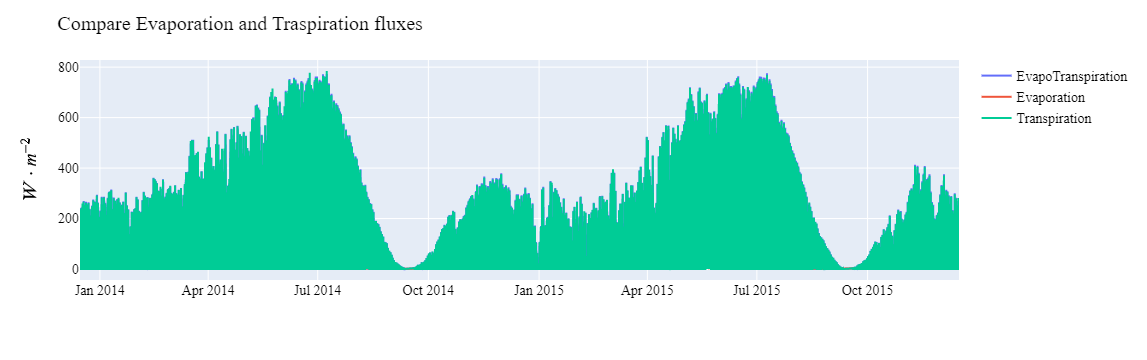

In [5]:
show_E_T('C_FluxEvapoTranspiration_1_totalstress.csv',
         'C_FluxEvaporation_1_totalstress.csv',
         'C_FluxTranspiration_1_totalstress.csv')

Viene riportato di seguito l'esempio di quanto calcolato prendendo come LAI un valore costante: si nota che la traspirazione è in ritardo rispetto all'evaporazione e che il contributo sull'evapotraspirazione finale è più equamente distribuito tra evaporazione e traspirazione.
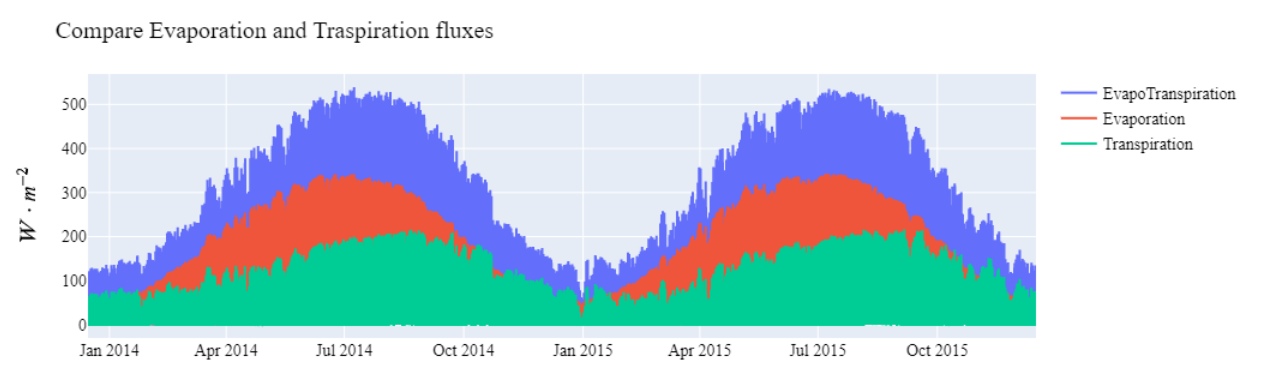